$\mathrm{softmax}(x)=\left[\frac{\exp(x_1)}{\sum_i\exp(x_i)}\quad\frac{\exp(x_2)}{\sum_i\exp(x_i)}\quad\ldots\quad\frac{\exp(x_i)}{\sum_i\exp(x_i)}\right]$

In [12]:
def quick_sort(nums):
    return nums if len(nums)<=1 else quick_sort([_ for _ in nums[1:] if _ <= nums[0]]) + [nums[0]] + quick_sort([_ for _ in nums[1:] if _ > nums[0]])

In [1]:
import os
import scipy.io as sio
import numpy as np
import cntk

In [8]:
file_path = "D:/missdd/ML_Project/Traffic_Flow_Prediction_LSTM/data"
data_train= "TrafficFlow_69_train"
data_test = "TrafficFlow_69_test"

In [37]:
x_train = sio.loadmat(os.path.join(file_path, data_train))['traffic_flow']
x_test = sio.loadmat(os.path.join(file_path, data_test))['traffic_flow']

In [38]:
print(x_train.shape)
print(x_test.shape)

(14473, 69)
(2953, 69)


In [136]:
x = np.concatenate((x_train, x_test))

In [9]:
f_n_train = "TrafficFlow_69_12week_6day_minmax_train"
f_n_test = "TrafficFlow_69_12week_6day_minmax_test"
f_g_train = "TrafficFlow_69_12week_6day_gaussian_train"
f_g_test = "TrafficFlow_69_12week_6day_gaussian_test"

n_train = sio.loadmat(os.path.join(file_path, f_n_train))
n_test = sio.loadmat(os.path.join(file_path, f_n_test))
g_train = sio.loadmat(os.path.join(file_path, f_g_train))
g_test = sio.loadmat(os.path.join(file_path, f_g_test))

In [88]:
print(n_train)
print(n_test)
print(g_train)
print(g_test)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Oct  8 12:42:58 2018', '__version__': '1.0', '__globals__': [], 'traffic_flow': array([[0.05639731, 0.05050505, 0.04040404, ..., 0.10858586, 0.18602694,
        0.12794613],
       [0.06481481, 0.05387205, 0.03619529, ..., 0.12626263, 0.17424242,
        0.10606061],
       [0.05892256, 0.05723906, 0.04461279, ..., 0.12037037, 0.19276094,
        0.11952862],
       ...,
       [0.12542088, 0.07912458, 0.10521886, ..., 0.25673401, 0.45622896,
        0.30218855],
       [0.11447811, 0.07407407, 0.0959596 , ..., 0.25084175, 0.41245791,
        0.26599327],
       [0.09680135, 0.07491582, 0.07154882, ..., 0.21212121, 0.40488215,
        0.25757576]]), 'vmax': array([[1188]], dtype=uint16)}
{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Oct  8 12:42:58 2018', '__version__': '1.0', '__globals__': [], 'traffic_flow': array([[0.05976431, 0.05808081, 0.06060606, ..., 0.16077441, 0.19023569,
        0.137205

In [12]:
print(n_train['traffic_flow'].shape, np.amin(n_train['traffic_flow']), np.amax(n_train['traffic_flow']), n_train['vmax'])
print(n_test['traffic_flow'].shape, np.amin(n_test['traffic_flow']), np.amax(n_test['traffic_flow']), n_test['vmax'])
print(g_train['traffic_flow'].shape, np.amin(g_train['traffic_flow']), np.amax(g_train['traffic_flow']), g_train['vmax'], np.std(g_train['traffic_flow']), g_train['vmax'], g_train['vmean'].shape, g_train['vstd'].shape)
print(g_test['traffic_flow'].shape, np.amin(g_test['traffic_flow']), np.amax(g_test['traffic_flow']), np.std(g_test['traffic_flow']), g_test['vmax'], g_test['vmean'].shape, g_test['vstd'].shape)

(17280, 69) 0.0 1.0 [[1188]]
(3456, 69) 0.0 1.0 [[1188]]
(17280, 69) -2.6138552478681674 4.9848235661786635 [[1188]] 1.0016931198204113 [[1188]] (1, 69) (1, 69)
(3456, 69) -2.4112407308292796 3.140981457464854 0.990939002038646 [[1188]] (1, 69) (1, 69)


In [6]:
data_k1 = "X_input_69_k1"
x_k1 = sio.loadmat(os.path.join(file_path, data_k1))['X_input']

In [26]:
print(x.shape)
print(x_k1.shape)

(20736, 69)
(17280, 69)


In [31]:
x_re = x[:1440]
for i in range(1728,len(x)-1728+1, 1728):    
    x_re = np.concatenate((x_re, x[i:i+1440]))

In [32]:
print(x_re.shape)

(17280, 69)


In [34]:
print((x_k1==x_re).all())

True


In [39]:
print((x_train[:14400]==x_re[:14400]).all())
print((x_test[:2880]==x_re[14400:]).all())

True
True


In [26]:
def generate_next(x, batch_size, time_step):
    bs = batch_size
    ts = time_step
    n_weekday = 1440
    n_week = 1728
    _x = []
    _y = []
    _bs = 0
    print("len(x):", len(x))
    for i in range(0, len(x)-n_week+1, n_week):
#         print(i)
        for j in range(i, i+n_weekday):
            _x.append(x[j:j+ts])
            _y.append(x[j+ts])
            _bs += 1
            if _bs == bs:
#                 print(i,j)
                _x = np.array(_x)
                _y = np.array(_y)
                yield _x, _y
                _x = []
                _y = []
                _bs = 0

In [44]:
for i, j in generate_next(n_test['traffic_flow'], 144, 4):
    print(i.shape, j.shape)
#     print(i[:4], j[:4])

len(x): 3456
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)
(144, 4, 69) (144, 69)


In [60]:
def get_xy(x, time_step):
    ts = time_step
    n_weekday = 1440
    n_week = 1728
    _x = []
    _y = []
    for i in range(0, len(x)-n_week+1, n_week):
        for j in range(i, i+n_weekday):
            _x.append(x[j:j+ts])
            _y.append(x[j+ts])
    return np.asarray(_x, dtype=np.float32), np.asarray(_y, dtype=np.float32)
x_flow, target = get_xy(n_train['traffic_flow'], 1)
print(x_flow.shape)
print(target.shape)

(14400, 1, 69)
(14400, 69)


In [74]:
def shuffle(x, y):
#     np.random.seed(4)
    randomorder = np.arange(len(y))
    np.random.shuffle(randomorder)
    print("order", randomorder)
    x = x[randomorder]
    y = y[randomorder]
    return x, y
a1 = np.arange(24).reshape(3,2,4)
a2 = np.arange(12).reshape(3,4)
print(a1)
print(a2)
a1, a2 = shuffle(a1, a2)
print("shuffle")

print(a1)
print(a2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
order [2 0 1]
shuffle
[[[16 17 18 19]
  [20 21 22 23]]

 [[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]]


In [24]:
a1 = np.arange(48).reshape(6,2,4)
print(a1)
a1 = a1.reshape(-1,a1.shape[-1]*a1.shape[-2])
print(a1)


[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]]

 [[40 41 42 43]
  [44 45 46 47]]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [85]:
size(a1)

NameError: name 'size' is not defined

In [2]:
hidden_size = 512
num_layers = 2
keep_prob = 0.7
use_residual = True
resWeight = 0.3

inputs = cntk.sequence.input_variable((69), name='inputs')
target = cntk.input_variable((69), name='target')

def lstm_cell():
    _cell_creator = cntk.layers.Recurrence(cntk.layers.LSTM(hidden_size), name='basic_lstm')  
    _cell_creator = cntk.layers.Dropout(keep_prob = keep_prob)(_cell_creator)
    return _cell_creator

_cell_creator = lstm_cell
if use_residual:
    if num_layers < 2:
        raise ValueError("if using residual connection, num_layers should be greater than 1")
    print("  ** using residual **  ")
    _output = _cell_creator()(inputs)
    for _ in range(num_layers-1):
        _output = resWeight * _cell_creator()(_output) + _output
    # _output = _cell_creator()(_output) + _output
else:
    cell = cntk.layers.For(range(num_layers), lambda:_cell_creator())
    _output = cell(inputs)
output = cntk.sequence.last(_output)
# output = cntk.layers.Dropout(keep_prob=keep_prob, seed=1)(output)
output = cntk.layers.Dense(69)(output)
loss = cntk.squared_error(output, target)
cntk.logging.graph.plot(loss, filename='model.png')
cost_mape = cntk.reduce_mean(cntk.abs(output-target)/target, axis=cntk.Axis.all_axes(), name='mape') 
cost_mae = cntk.reduce_mean(cntk.abs(output-target), axis=cntk.Axis.all_axes(), name='mae')
cost_rmse = cntk.reduce_l2((output-target), axis=cntk.Axis.all_axes(), name='rmse')   
criterion = cntk.combine([loss, cost_mape])
cost = cntk.combine([cost_mape, cost_mae, cost_rmse])

  ** using residual **  



In [143]:
criterion = cntk.combine([loss, cost_mape])

In [144]:
lr = 0.1
learner = cntk.learners.adagrad(
            output.parameters,
            lr = cntk.learners.learning_parameter_schedule_per_sample([lr]*2+[lr/2]*3+[lr/4], epoch_size=8),
            gradient_clipping_threshold_per_sample = 2.3,
            gradient_clipping_with_truncation = True
        )

trainer = cntk.Trainer(None, criterion, learner)
trainer.test_minibatch({inputs:i, target:j})

D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input11809") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input11810") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


28.3543643951416

In [4]:
inputs = cntk.input_variable((2), name='inputs')
target = cntk.input_variable((2), name='target')
output = inputs
loss = cntk.squared_error(target, output)
cost_mape = cntk.reduce_mean(cntk.abs(output-target)/target, axis=cntk.Axis.all_axes(), name='mape') 
cost_mae = cntk.reduce_mean(cntk.abs(output-target), axis=cntk.Axis.all_axes(), name='mae')
cost_rmse = cntk.sqrt(cntk.reduce_mean(cntk.square(output-target), axis=cntk.Axis.all_axes(), name='rmse'))
cost = cntk.combine([cost_mape, cost_mae, cost_rmse])
a1 = np.asarray([[1,2],[0,4]], dtype=np.float32)
a2 = np.asarray([[2,2],[2,2]], dtype=np.float32)
print(loss.eval({inputs:a1, target:a2}))
print(cost_mape.eval({inputs:a1, target:a2}))
print(cost_mae.eval({inputs:a1, target:a2}))
print(cost_rmse.eval({inputs:a1, target:a2}))
c = cost.eval({inputs:a1, target:a2})

[1. 8.]
0.625
1.25
1.5


In [6]:
print((0.5+1+1)/4)
print(5/4)
print(np.sqrt(9/4))

0.625
1.25
1.5


In [5]:
(0.5+2)/4

0.625

In [162]:
vmax = float(n_train['vmax'])
print(vmax)
costs = {'mape':[], 'mae':[], 'rmse':[]}
x = np.random.rand(4,144,8,69)
y = np.random.rand(4,144,69)
for _x, _y in zip(x, y):
    _costs = cost.eval({inputs:_x, target:_y})
    for key in _costs:
        if key.name == 'mape':
            costs[key.name].append(float(_costs[key]))  
        else:
            costs[key.name].append(float(_costs[key])*vmax)
print(costs['mape'])    
print(costs['mae'])

1188.0


D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input16336") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input16337") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


[1.4952059984207153, 1.8339388370513916, 1.2984944581985474, 1.3210924863815308]
[603.8841290473938, 603.7221150398254, 601.5847055912018, 601.6767590045929]


In [152]:
print(costs['mape'])
print(costs['mae'])
print(costs['rmse'])

0.5
1.0
2.4494898


In [47]:
print(np.sum(loss.eval({inputs:i, target:j})))
print(cost_mape.eval({inputs:i, target:j}))
print(cost_mae.eval({inputs:i, target:j}))
print(cost_rmse.eval({inputs:i, target:j}))

1287.7181
0.9808816
0.33523437
35.88479


D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input6397") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
D:\software\Anaconda3\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input6398") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


In [ ]:
print(np.mean(loss.eval({inputs:i, target:j})))
print(cost_mape.eval({inputs:i, target:j}))
print(cost_mae.eval({inputs:i, target:j}))
print(cost_rmse.eval({inputs:i, target:j}))

In [122]:
a1 = np.random.rand(2,3)
a2 = []
for i in range(len(a1)):
    a2.append(a1[i])
print(a2)
a2 = np.array(a2)
a2

[array([0.34615607, 0.16813974, 0.79670599]), array([0.37133976, 0.30197209, 0.5305618 ])]


array([[0.34615607, 0.16813974, 0.79670599],
       [0.37133976, 0.30197209, 0.5305618 ]])

In [120]:
def generate_next(x, y, bs):
    for i in range(0, len(x)-bs+1, bs):
        yield x[i:i+bs], y[i:i+bs]
a1 = np.random.rand(10,4)
print(a1)
a2 = np.random.randint(10, size=(10,1))
print(a2)
for i,j in generate_next(a1, a2, 3):
    print(i)
    print(j)

[[0.01560606 0.42879572 0.06807407 0.25194099]
 [0.22116092 0.25319119 0.13105523 0.01203622]
 [0.1154843  0.61848026 0.97425621 0.990345  ]
 [0.4090541  0.16295443 0.63876176 0.49030535]
 [0.98940978 0.06530421 0.78323444 0.2883985 ]
 [0.24141862 0.66250457 0.24606318 0.66585912]
 [0.51730852 0.42408899 0.55468781 0.28705152]
 [0.70657471 0.41485687 0.36054556 0.82865691]
 [0.92496691 0.04600731 0.23262699 0.34851937]
 [0.81496648 0.98549143 0.9689717  0.90494835]]
[[7]
 [5]
 [0]
 [4]
 [1]
 [1]
 [6]
 [6]
 [0]
 [2]]
[[0.01560606 0.42879572 0.06807407 0.25194099]
 [0.22116092 0.25319119 0.13105523 0.01203622]
 [0.1154843  0.61848026 0.97425621 0.990345  ]]
[[7]
 [5]
 [0]]
[[0.4090541  0.16295443 0.63876176 0.49030535]
 [0.98940978 0.06530421 0.78323444 0.2883985 ]
 [0.24141862 0.66250457 0.24606318 0.66585912]]
[[4]
 [1]
 [1]]
[[0.51730852 0.42408899 0.55468781 0.28705152]
 [0.70657471 0.41485687 0.36054556 0.82865691]
 [0.92496691 0.04600731 0.23262699 0.34851937]]
[[6]
 [6]
 [0]]


In [22]:
param = {}
params['shuffle'] = "True"
params['seed'] = 0

norm = np.amax(X_input)
X_input /= norm
Y_output /= norm

X_train = X_input[:14400,:]
X_test = X_input[14400:,:]
Y_train = Y_output[0:14400,:]
Y_test = Y_output[14400:,:]

if params.data_Gaussian:
    X_mean = np.mean(X_train, axis = 0)
    X_std  = np.std(X_train, axis = 0)
    X_train -= X_mean
    X_train /= X_std
    X_test -= X_mean
    X_test /= X_std

totnum=len(INPUT_train)
printf(1, 'Size of the training dataset= %5d \n', totnum)

if params.data_shuffle:
    np.random.seed(params.seed)
    randomorder = np.arange(tonum)
    np.random.shuffle(randomorder)
    INPUT_train = INPUT_train[randomorder]
    Y_train = Y_train[randomorder]


17280

In [44]:
import numpy as np
np.random.seed(0)
index = np.arange(5)
a1 = np.arange(10).reshape(5,2)
a2 = np.arange(2,12).reshape(5,2)
print(a1)
print(a2)
np.random.shuffle(index)
print(a1[index])
print(a2[index])


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[[4 5]
 [0 1]
 [2 3]
 [6 7]
 [8 9]]
[[ 6  7]
 [ 2  3]
 [ 4  5]
 [ 8  9]
 [10 11]]


In [43]:
def hh(a, b):
    return a+b
a1 = 'hh'
a2 = eval(a1)(2,3)
a2

5

In [74]:
import math
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import time

import cntk as C
import cntk.tests.test_utils
cntk.tests.test_utils.set_device_from_pytest_env() # (only needed for our build system)

%matplotlib inline

In [75]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    splits np.array into training, validation and test
    """
    pos_test = int(len(data) * (1 - test_size))
    pos_val = int(len(data[:pos_test]) * (1 - val_size))

    train, val, test = data[:pos_val], data[pos_val:pos_test], data[pos_test:]

    return {"train": train, "val": val, "test": test}

In [76]:
def generate_data(fct, x, time_steps, time_shift):
    """
    generate sequences to feed to rnn for fct(x)
    """
    data = fct(x)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(dict(a = data[0:len(data) - time_shift],
                                 b = data[time_shift:]))
    rnn_x = []
    for i in range(len(data) - time_steps + 1):
        rnn_x.append(data['a'].iloc[i: i + time_steps].as_matrix())
    rnn_x = np.array(rnn_x)

    # Reshape or rearrange the data from row to columns
    # to be compatible with the input needed by the LSTM model
    # which expects 1 float per time point in a given batch
    rnn_x = rnn_x.reshape(rnn_x.shape + (1,))

    rnn_y = data['b'].values
    rnn_y = rnn_y[time_steps - 1 :]

    # Reshape or rearrange the data from row to columns
    # to match the input shape
    rnn_y = rnn_y.reshape(rnn_y.shape + (1,))

    return split_data(rnn_x), split_data(rnn_y)

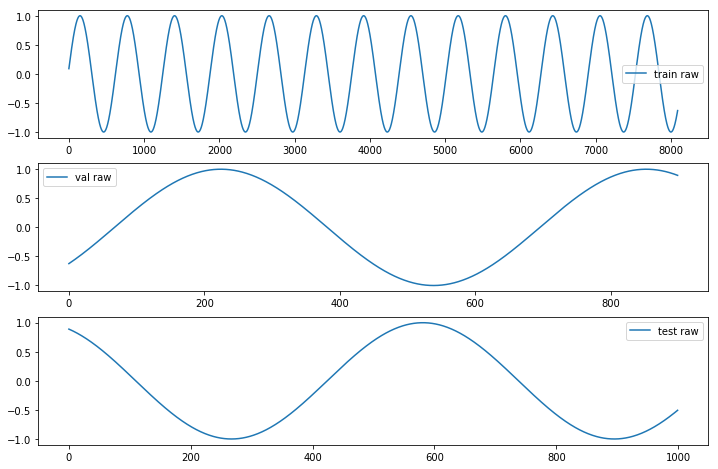

In [77]:
N = 5 # input: N subsequent values
M = 5 # output: predict 1 value M steps ahead
X, Y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), N, M)

f, a = plt.subplots(3, 1, figsize=(12, 8))
for j, ds in enumerate(["train", "val", "test"]):
    a[j].plot(Y[ds], label=ds + ' raw');
[i.legend() for i in a];

In [78]:
def create_model(x):
    """Create the model for time series prediction"""
    with C.layers.default_options(initial_state = 0.1):
        m = C.layers.Recurrence(C.layers.LSTM(N))(x)
        m = C.sequence.last(m)
        m = C.layers.Dropout(0.2, seed=1)(m)
        m = C.layers.Dense(1)(m)
        return m


In [79]:
def next_batch(x, y, ds):
    """get the next batch to process"""

    def as_batch(data, start, count):
        part = []
        for i in range(start, start + count):
            part.append(data[i])
        return np.array(part)

    for i in range(0, len(x[ds])-BATCH_SIZE, BATCH_SIZE):
        yield as_batch(x[ds], i, BATCH_SIZE), as_batch(y[ds], i, BATCH_SIZE)

In [82]:
isFast = True
TRAINING_STEPS = 10000
BATCH_SIZE = 100
EPOCHS = 10 if isFast else 100
x_axes = [C.Axis.default_batch_axis(), C.Axis.default_dynamic_axis()]
C.input_variable(1, dynamic_axes=x_axes)

# input sequences
x = C.sequence.input_variable(1)

# create the model
z = create_model(x)

# expected output (label), also the dynamic axes of the model output
# is specified as the model of the label input
l = C.input_variable(1, dynamic_axes=z.dynamic_axes, name="y")

# the learning rate
learning_rate = 0.02
lr_schedule = C.learning_parameter_schedule(learning_rate)

# loss function
loss = C.squared_error(z, l)

# use squared error to determine error for now
error = C.squared_error(z, l)

# use fsadagrad optimizer
momentum_schedule = C.momentum_schedule(0.9, minibatch_size=BATCH_SIZE)
learner = C.fsadagrad(z.parameters,
                      lr = lr_schedule,
                      momentum = momentum_schedule,
                      unit_gain = True)

trainer = C.Trainer(z, (loss, error), [learner])

In [ ]:
# train
loss_summary = []
start = time.time()
for epoch in range(0, EPOCHS):
    for x1, y1 in next_batch(X, Y, "train"):
        trainer.train_minibatch({x: x1, l: y1})
    if epoch % (EPOCHS / 10) == 0:
        training_loss = trainer.previous_minibatch_loss_average
        loss_summary.append(training_loss)
        print("epoch: {}, loss: {:.5f}".format(epoch, training_loss))

print("training took {0:.1f} sec".format(time.time() - start))


In [87]:
i = 0
for x1, y1 in next_batch(X, Y, "train"):
        print(len(x1), len(y1))
        print(x1.shape, y1.shape)
        i += 1
        if i == 1:
            break

100 100
(100, 5, 1) (100, 1)


In [22]:
a1 = 1.353453
with open('test.txt', 'w') as f:
    f.write('{0}\n{1}\n{2}\n{3}'.format('e',a1,a1,a1))